1. [Drill Answer](#answer)

In [1]:
import numpy as np
import pandas as pd
import re
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import math
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf

In [3]:
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore",module="scipy",message="^internal gelsd")

In [4]:
file = 'data/fbi.txt'
df = pd.read_csv(file,header=None)
df.columns =['city','population','violent','murder','rape1','rape','robbery','assault',
             'property','burglary','larceny','vehicletheft','arson']
df = df.drop(columns = ['rape1', 'arson'])
df = df.drop([  7,  35, 216, 272, 310, 346])
df.index =  range(len(df))
df.tail(2)

,city,population,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicletheft
340,Woodstock Town,"5,931",2,0,0,0,2,58,13,45,0
341,Yorktown Town,"36,643",15,0,0,2,13,334,45,287,2


## Drill: fixing assumptions <a name="answer"></a>

- per the dataset notes discarded arson(note 3) and rape(note 1) as it was incomplete 
- list of rows with populations over 100,000 [  7,  35, 216, 272, 310, 346]

In [5]:
# cleaning 
def A(df): return df.apply(lambda x: x.str.replace(r'\D', '', regex=True), axis=1)   # remove non-digits 
def B(df): return df.apply(lambda x: x.str.strip(), axis=1)                          #  strip()
def C(df): return df.apply(lambda x: int(x), axis=1)                                 # int()
# dictionary with f() as values
switch = {char:eval(char) for char in 'ABC'}
# string of letters of functions to apply
def df_cleaning(df, string):
    for char in string:
        df = switch[char](df)
    return df 

In [6]:
clean_cols = ['population','violent','rape','robbery','assault','property','burglary','larceny','vehicletheft']
series = [df_cleaning(pd.DataFrame(df[col]),'ABC') for col in clean_cols]
df1 = pd.DataFrame(series, index=clean_cols).T
df1.tail(2)

,population,violent,rape,robbery,assault,property,burglary,larceny,vehicletheft
340,5931,2,0,0,2,58,13,45,0
341,36643,15,0,2,13,334,45,287,2


In [7]:
df2 = df.drop(columns = (clean_cols + ['city']))
data = pd.concat([df2, df1], axis = 1)
data.tail(2)

,murder,population,violent,rape,robbery,assault,property,burglary,larceny,vehicletheft
340,0,5931,2,0,0,2,58,13,45,0
341,0,36643,15,0,2,13,334,45,287,2


In [39]:
feats = ['population','violent','rape','robbery','assault','burglary','larceny','vehicletheft']
ft2 = [[list((p,f)) for f in feats] for p in ['population'] ][0][1:]

In [64]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['property'].values.reshape(-1, 1)
X = data[['violent', 'larceny']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.78925906 1.12839734]]

Intercept: 
 [2.99388498]

R-squared:
0.9958061737773204


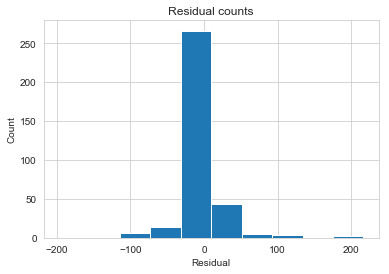

In [65]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data.property
# Calculate the error, also called the residual.
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts');plt.xlabel('Residual');plt.ylabel('Count')
plt.show()

In [66]:
residual.describe()

count    342.000
mean      -0.000
std       32.015
min     -196.690
25%       -5.874
50%       -1.966
75%        4.441
max      216.632
Name: property, dtype: float64

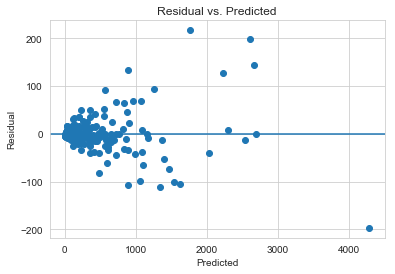

In [67]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [68]:
correlation_matrix = X.corr()
display(correlation_matrix)

,violent,larceny
violent,1.000,0.761
larceny,0.761,1.000


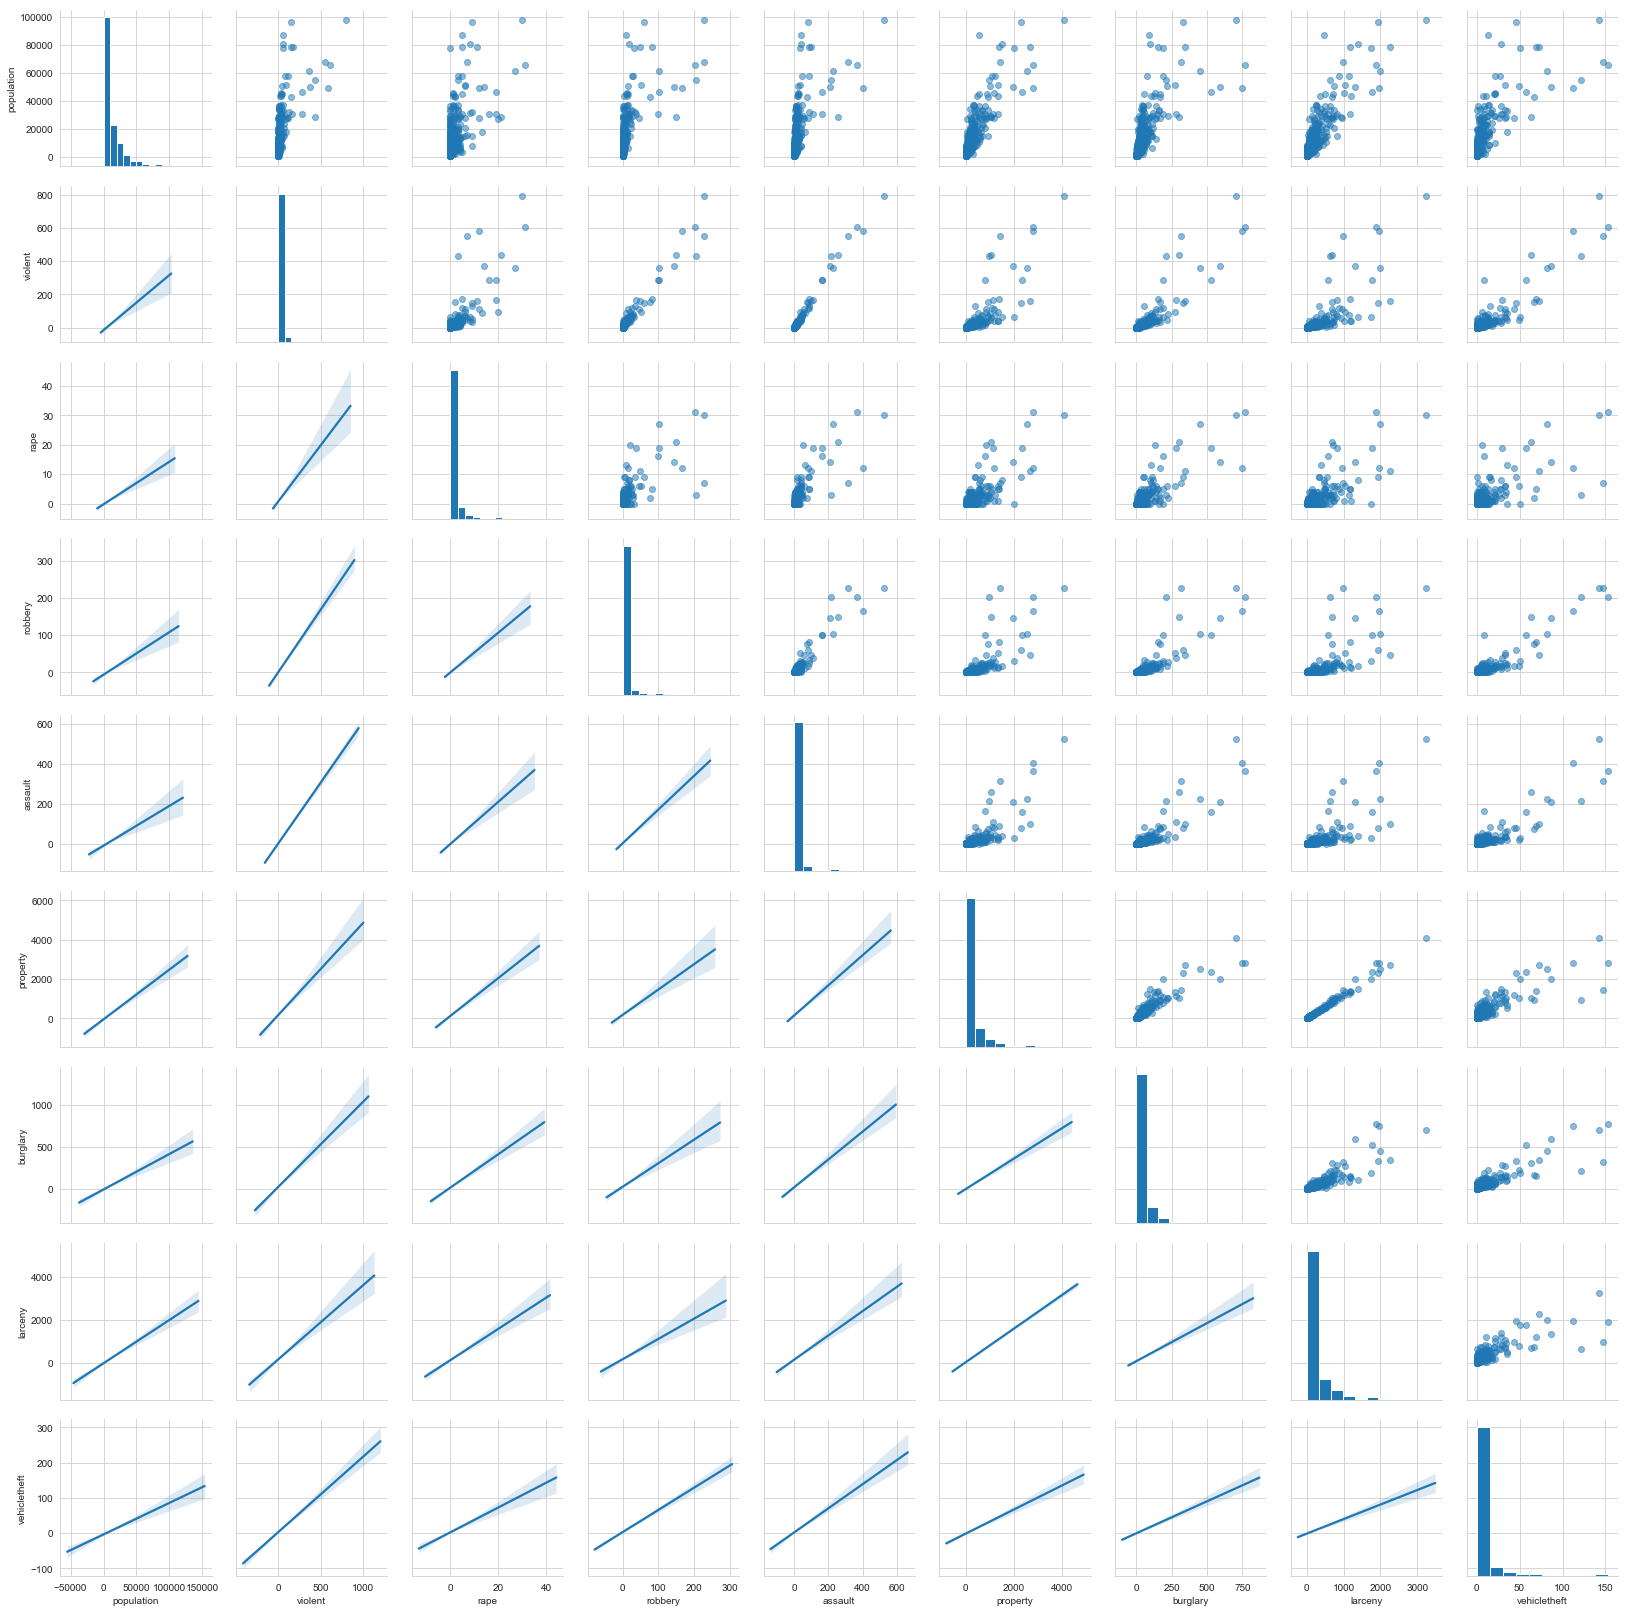

In [53]:
sns.set_style("whitegrid")
g = sns.PairGrid(df1, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(plt.hist)
plt.show()

In [ ]:
np.where(df1.population >= 100000)

In [ ]:
ax = sns.scatterplot(x="population", y="property", data=df1)
    

In [ ]:
dff['is_murder'] = np.where(dff.murder,1,0)
dff['is_robbery'] = np.where(dff.robbery,1,0)
